# Random Forest

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.regression_metrics import regression

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/electricity_transformer.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/electricity_transformer.parquet')

In [3]:
y_train = train.OT_next
X_train = train.drop(columns=['date', 'OT_next'])

In [4]:
y_validation = validation.OT_next
X_validation = validation.drop(columns=['date', 'OT_next'])

In [7]:
exploratory_depths = [1, 10, 20, 30, 40, 50]
exploratory_estimators = [5, 10, 20, 30, 50, 60, 100]

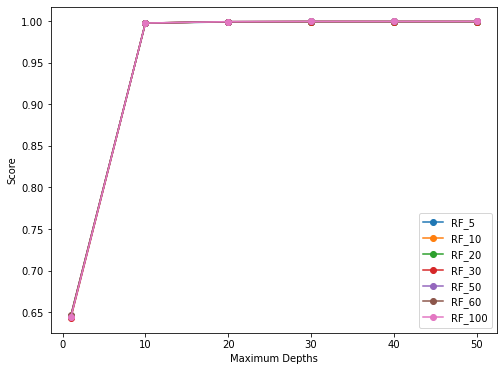

In [8]:
plt.figure(figsize=(8, 6))

for n in exploratory_estimators:
    plt.plot(exploratory_depths, [RandomForestRegressor(n_estimators=n, max_depth=i).fit(X_train, y_train).score(X_train, y_train) for i in exploratory_depths], 
             marker= 'o', label='RF_'+str(n))
    
plt.xlabel('Maximum Depths')
plt.ylabel('Score')
plt.legend()
plt.show()

Literally null improvals on number of trees and depth from 10 and above

In [9]:
max_depth = [1, 3, 5, 7, 10, 12, 15]
n_estimators = [1, 5, 10, 15, 20]

In [10]:
models_list = []
names_list = []
for n in n_estimators:
    for i in max_depth:
        models_list.append(RandomForestRegressor(n_estimators=n, max_depth=i))
        names_list.append('RF_'+str(n)+'_'+str(i))

In [11]:
metrics = regression(models_list, names_list, '../../../data/model_output/metrics/electricity_transformer/random_forest.csv', X_train, y_train, X_validation, y_validation, metrics={})
metrics

,Run_Time,Train_RMSE,Validation_RMSE,delta%
RF_1_1,0.273299,5.022048,8.106026,61.408770
RF_1_3,0.569477,1.469362,2.895712,97.072794
RF_1_5,0.916517,0.619592,0.896463,44.686081
RF_1_7,1.298553,0.500300,0.374653,-25.114319
RF_1_10,2.063474,0.476727,0.397973,-16.519658
RF_1_12,2.521235,0.452638,0.467035,3.180763
RF_1_15,3.203430,0.441761,0.557831,26.274237
RF_5_1,0.929514,4.997810,8.066569,61.402088
RF_5_3,2.575111,1.385823,2.733442,97.243199
RF_5_5,4.246667,0.566642,0.824573,45.519110


In [12]:
metrics[metrics['delta%']<20].sort_values(by='Validation_RMSE')

,Run_Time,Train_RMSE,Validation_RMSE,delta%
RF_15_7,18.722589,0.473006,0.320391,-32.265045
RF_10_7,12.378885,0.473434,0.323869,-31.591529
RF_5_7,6.310092,0.476932,0.327145,-31.406409
RF_20_7,24.806727,0.472270,0.329288,-30.275597
RF_15_12,37.241390,0.369348,0.339188,-8.165782
RF_10_12,24.317975,0.373221,0.349948,-6.235781
RF_20_15,63.250104,0.306740,0.353018,15.087146
RF_5_10,9.717039,0.422836,0.355019,-16.038626
RF_15_15,47.479986,0.309910,0.357272,15.282606
RF_20_10,38.960115,0.412080,0.361011,-12.392963


We are left with **RF_15_7**.

In [5]:
test =  pd.read_parquet('../../../data/model_input/test_sets/electricity_transformer.parquet')

In [6]:
y_test = test.OT_next
X_test = test.drop(columns=['date', 'OT_next'])

In [7]:
retrain = pd.concat([train, validation])

In [8]:
y_retrain = retrain.OT_next
X_retrain = retrain.drop(columns=['date', 'OT_next'])

In [17]:
model = RandomForestRegressor(n_estimators=15, max_depth=7).fit(X_retrain, y_retrain)

In [18]:
test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, test_pred)
print('Test RMSE:', round(rmse, 4))

Test RMSE: 0.3357


That's it, it works as expected

In [19]:
dump(model, '../../../data/model_output/models/electricity_transformer/best_random_forest.joblib')

['best_random_forest.joblib']

In [20]:
with open('../../../data/model_output/metrics/electricity_transformer/final_RMSE.txt', 'a') as f:
    f.write('\nRF, '+ str(rmse))

C:\Users\MANUEL~2\AppData\Local\Temp/ipykernel_12744/3731660872.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],


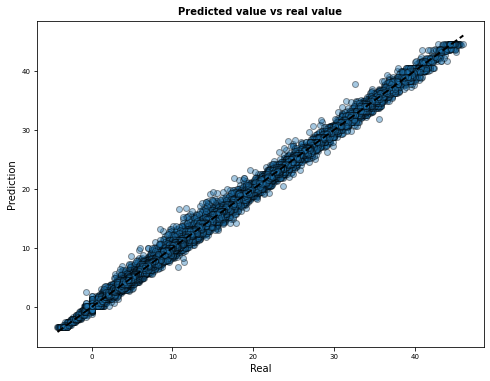

In [21]:
prediction_retrain = model.predict(X_retrain)
error_retrain   = prediction_retrain - y_retrain

plt.figure(figsize=(8, 6))

plt.scatter(y_retrain, prediction_retrain, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_retrain.min(), y_retrain.max()], [y_retrain.min(), y_retrain.max()],
                'k--', color = 'black', lw=2)
plt.title('Predicted value vs real value', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Prediction')
plt.tick_params(labelsize = 7)

In [9]:
from joblib import load
load_mod = load('../../../data/model_output/models/electricity_transformer/best_random_forest.joblib')

In [10]:
train_pred = load_mod.predict(X_retrain)
rmse_train = root_mean_squared_error(y_retrain, train_pred)
test_pred = load_mod.predict(X_test)
rmse_test = root_mean_squared_error(y_test, test_pred)

In [11]:
import time 
time1 = time.time()
RandomForestRegressor(n_estimators=15, max_depth=7).fit(X_retrain, y_retrain)
time2 = time.time() - time1 

In [12]:
with open('../../../data/model_output/metrics/electricity_transformer/final_metrics.txt', 'a') as f:
     f.write(f'\nRF; {time2}; {rmse_train}; {rmse_test}')